<a href="https://kritikseth.github.io/ipynbtagredirect" target="_parent"><img src="https://raw.githack.com/kritikseth/kritikseth/master/assets/icons/kritik_ipynbtagredirect.svg" alt="Kritik Seth"/></a>

In [1]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Excercise 1
Import the dataset-
https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv
or
https://raw.githubusercontent.com/kritikseth/Datasets/master/Automobile_Specification.csv


#### Store this dataset in a dataframe and add column headers

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
 "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
 "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
 "peak-rpm","city-mpg","highway-mpg","price"]

path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv'

In [4]:
df = pd.read_csv(path, names=headers)

#### Display first 5 lines of the dataset

In [5]:
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

#### Replace '?' characters with NaN in the dataset

In [6]:
df.replace('?', np.NaN, inplace = True)

In [7]:
df.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

#### Display the number of missiong values in each column and display it with column name

In [8]:
def missing_values(data):
    mv_count = data.isnull().sum()
    mv_percent = (data.isnull().sum() / data.count()) * 100
    mv_dtype = data.dtypes
    mv = pd.concat([mv_count, mv_percent, mv_dtype], axis = 1)
    mv.rename(columns = {0:'Count', 1:'Percent', 2:'Data Type'}, inplace = True)
    mv = mv[mv['Count'] > 0]
    print(mv)

In [9]:
missing_values(df)

                   Count    Percent Data Type
normalized-losses     41  25.000000    object
num-of-doors           2   0.985222    object
bore                   4   1.990050    object
stroke                 4   1.990050    object
horsepower             2   0.985222    object
peak-rpm               2   0.985222    object
price                  4   1.990050    object


#### Drop rows in 'price'column which have missing values

In [10]:
df.dropna(subset=['price'], inplace = True)

#### Replace missing values
* Mean- normalized-losses, bore, stroke, horsepower, peak-rpm
* Mode- num-of-doors

In [11]:
def imputer(data, **kwargs):
    if kwargs['itype'] == 'mean':
        for i in kwargs['cols']:
            data[i].fillna(df[i].astype('float32').mean(), inplace = True)
            
    elif kwargs['itype'] == 'mode':
        for i in kwargs['cols']:
            data[i].fillna(df[i].mode()[0], inplace = True)
            
    elif kwargs['itype'] == 'median':
        for i in kwargs['cols']:
            data[i].fillna(df[i].median(), inplace = True)
            
    return data

In [12]:
df = imputer(df, itype = 'mean', cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm'])
df = imputer(df, itype = 'mode', cols = ['num-of-doors'])

In [13]:
missing_values(df)

Empty DataFrame
Columns: [Count, Percent, Data Type]
Index: []


#### Reset the index of the dataframe

In [14]:
df.reset_index(inplace = True)

#### Check datatype of columns and convert numeric/quantitative variables to float or int¶

In [15]:
df.dtypes

index                  int64
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [16]:
df['horsepower'] = df['horsepower'].astype(int)

Numric variables already int / float

#### Transform city-mpg and highway-mpg into liters/100km using conversion formula

L/100km = 235/mpg i.e. create two new column “city-L/100km” and “highway-L/100km”

In [17]:
df['city-L/100km'] = 235/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']

#### Normalize the columns 'length', 'width' and 'height' so that their values range from 0 to 1

Since the values in these columns are non-negative you can simple divide each value in a column with the coresponding max value.

In [18]:
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

#### Plot the histogram of horsepower to see its distribution

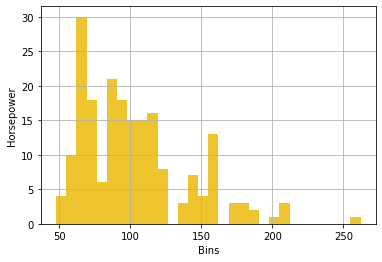

In [19]:
n, bins, patches = plt.hist(df['horsepower'], bins = 30,  facecolor = '#edc42d')
plt.xlabel('Bins')
plt.ylabel('Horsepower')
plt.grid(True)
plt.show()

#### Create three equal sized bins 'low', 'medium', 'high' and organize values in column horsepower into new column 'horsepower-binned'

In [20]:
#pd.cut / pd.qcut
label_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.qcut(df['horsepower'], labels = label_names, q = 3)
df['horsepower-binned'].value_counts()

Low       68
Medium    67
High      66
Name: horsepower-binned, dtype: int64

In [21]:
npbins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
#4 since  3 bins of equal length (we have 4 dividers)

In [22]:
df['horsepower-binned1'] = pd.cut(df['horsepower'], bins = npbins, labels = label_names, include_lowest = True)
df['horsepower-binned1'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned1, dtype: int64

In [23]:
df['horsepower-binned2'] = pd.cut(df['horsepower'], bins = 3, labels = label_names, include_lowest = True)
df['horsepower-binned2'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned2, dtype: int64

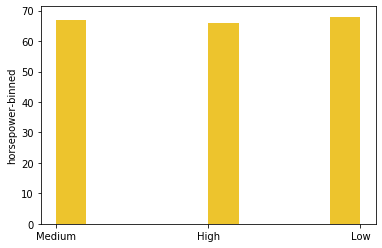

In [24]:
plt.hist(df['horsepower-binned'], facecolor = '#edc42d')
plt.ylabel('horsepower-binned')
plt.show()

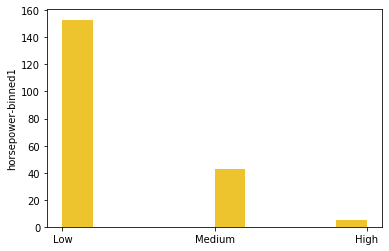

In [25]:
plt.hist(df['horsepower-binned1'], facecolor = '#edc42d')
plt.ylabel('horsepower-binned1')
plt.show()

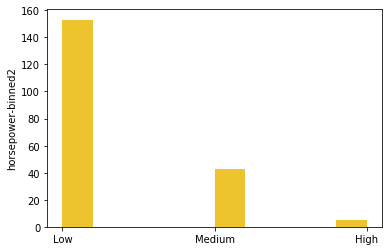

In [26]:
plt.hist(df['horsepower-binned2'], facecolor = '#edc42d')
plt.ylabel('horsepower-binned2')
plt.show()

####  Convert 'fuel-type' and 'aspiration' into one-hot-encoded variables and then drop columns 'fuel-type' and 'aspiration'

In [27]:
df = pd.get_dummies(df, prefix_sep = '_', columns = ['fuel-type', 'aspiration'])

In [28]:
df.head(5)

index  symboling normalized-losses         make num-of-doors   body-style  \
0      0          3               122  alfa-romero          two  convertible   
1      1          3               122  alfa-romero          two  convertible   
2      2          1               122  alfa-romero          two    hatchback   
3      3          2               164         audi         four        sedan   
4      4          2               164         audi         four        sedan   

  drive-wheels engine-location  wheel-base    length  ...  price  \
0          rwd           front        88.6  0.811148  ...  13495   
1          rwd           front        88.6  0.811148  ...  16500   
2          rwd           front        94.5  0.822681  ...  16500   
3          fwd           front        99.8  0.848630  ...  13950   
4          4wd           front        99.4  0.848630  ...  17450   

   city-L/100km  highway-L/100km horsepower-binned horsepower-binned1  \
0     11.190476         8.703704            Medium                Low   
1     11.190476         8.703704            Medium                Low   
2     12.368421         9.038462              High             Medium   
3      9.791667         7.833333            Medium                Low   
4     13.055556        10.681818              High                Low   

   horsepower-binned2 fuel-type_diesel fuel-type_gas aspiration_std  \
0                 Low                0             1              1   
1                 Low                0             1              1   
2              Medium                0             1              1   
3                 Low                0             1              1   
4                 Low                0             1              1   

   aspiration_turbo  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 34 columns]

## Excercise 2
Import the dataset-
https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv
or
https://raw.githubusercontent.com/kritikseth/Datasets/master/Automobile_Specification_2.csv


#### Store this dataset in a dataframe

In [29]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [30]:
df1 = pd.read_csv(path)

#### Display the dimensions and datatypes for each column

In [31]:
df1.head(), df1.dtypes, df1.shape

(   symboling  normalized-losses         make aspiration num-of-doors  \
 0          3                122  alfa-romero        std          two   
 1          3                122  alfa-romero        std          two   
 2          1                122  alfa-romero        std          two   
 3          2                164         audi        std         four   
 4          2                164         audi        std         four   
 
     body-style drive-wheels engine-location  wheel-base    length  ...  \
 0  convertible          rwd           front        88.6  0.811148  ...   
 1  convertible          rwd           front        88.6  0.811148  ...   
 2    hatchback          rwd           front        94.5  0.822681  ...   
 3        sedan          fwd           front        99.8  0.848630  ...   
 4        sedan          4wd           front        99.4  0.848630  ...   
 
    compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
 0                9.0       111

#### Calculate the correlation between 'engine-size' and 'price' using corr function

In [32]:
cor = df1.corr()
cor['engine-size']['price']

0.8723351674455199

#### Identify variables having poitive and negative correlation with 'price'

In [33]:
for i in cor:
    if cor['price'][i] > 0:
        print(f'Correlation of {i} with price is +ve')
    elif cor['price'][i] < 0:
        print(f'Correlation of {i} with price is -ve')
        

Correlation of symboling with price is -ve
Correlation of normalized-losses with price is +ve
Correlation of wheel-base with price is +ve
Correlation of length with price is +ve
Correlation of width with price is +ve
Correlation of height with price is +ve
Correlation of curb-weight with price is +ve
Correlation of engine-size with price is +ve
Correlation of bore with price is +ve
Correlation of stroke with price is +ve
Correlation of compression-ratio with price is +ve
Correlation of horsepower with price is +ve
Correlation of peak-rpm with price is -ve
Correlation of city-mpg with price is -ve
Correlation of highway-mpg with price is -ve
Correlation of price with price is +ve
Correlation of city-L/100km with price is +ve
Correlation of diesel with price is +ve
Correlation of gas with price is -ve


#### Check the datatype of variable 'peak-rpm'

In [34]:
df1['peak-rpm'].dtype

dtype('float64')

#### Using seaborn regplot() - plot relation between 'engine-size' and 'price', comment on your observation

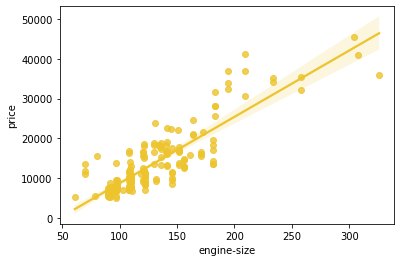

In [35]:
sns.regplot(x = 'engine-size', y = 'price', data = df1, color = '#edc42d')

As the engine size is increasing the price is also increasing

#### Identify using regplot(), which other variables affect 'price'

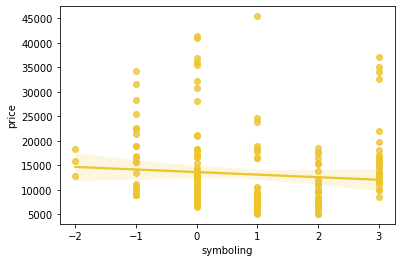

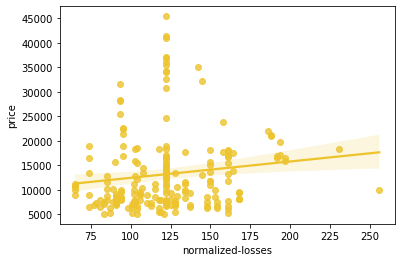

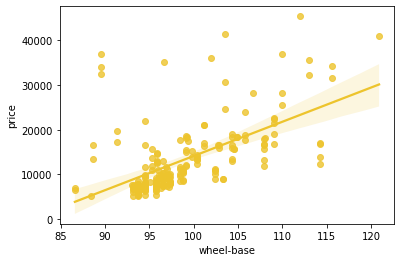

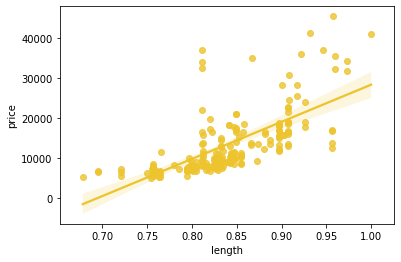

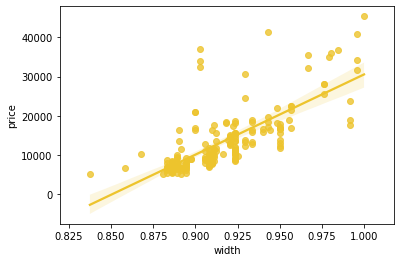

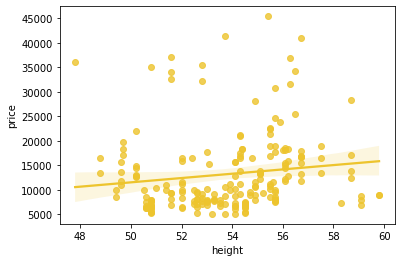

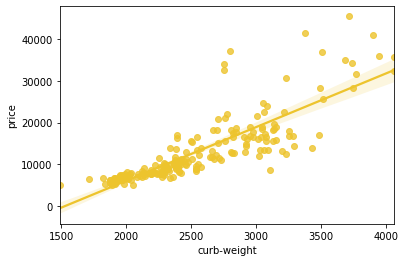

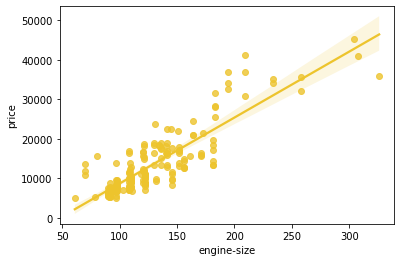

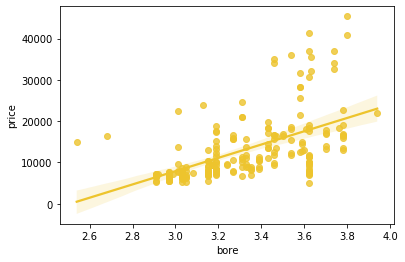

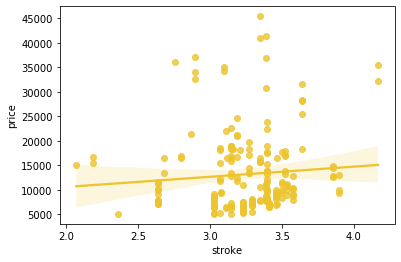

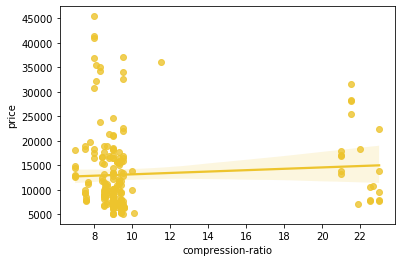

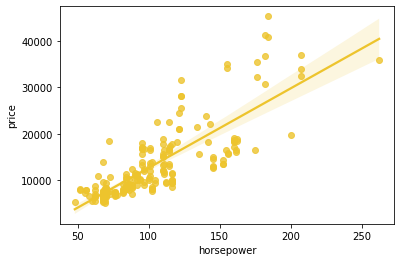

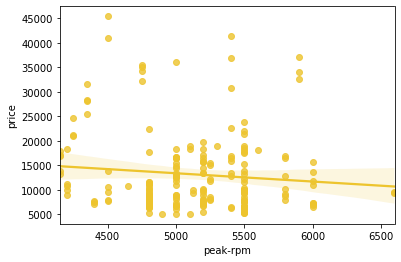

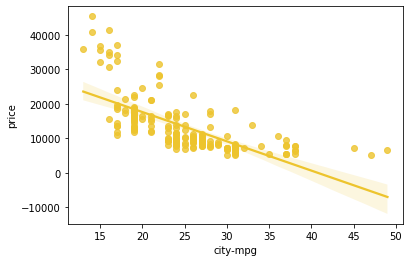

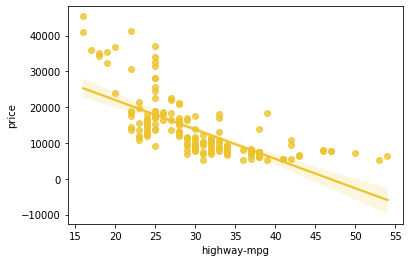

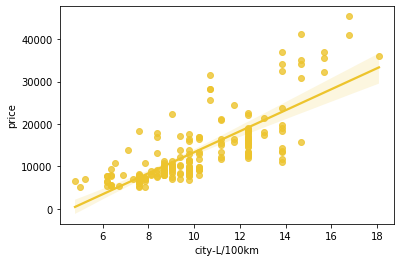

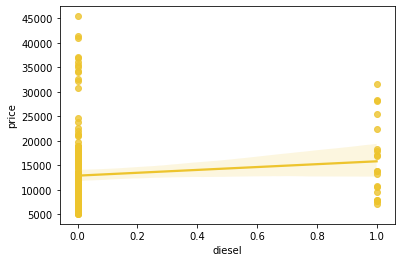

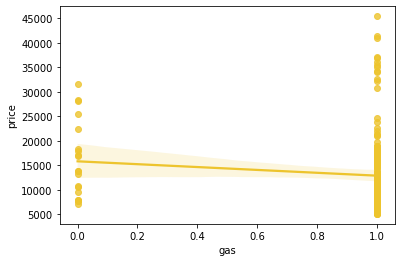

In [36]:
for i in df1.describe().columns:
    if i != 'price':
        sns.regplot(x = i, y = 'price', data = df1, color = '#edc42d')
        plt.show()

Conclusion:
* 'symboling' does not have a clear effect on 'price'
* 'normalized-losses' is directly propotional to 'price'
* 'wheel-base'is directly propotional to 'price'
* 'length'is directly propotional to 'price'
* 'width' is directly propotional to 'price'
* 'height' is directly propotional to 'price'
* 'curb' is directly propotional to 'price'
* 'engine-size' is directly propotional to 'price'
* 'bore' is directly propotional to 'price'
* 'stroke' does not have a clear effect on 'price'
* 'compression-ratio' does not have a clear effect on 'price'
* 'horsepower' is directly propotional to 'price'
* 'peak-rpm'does not have a clear impact on 'price'
* 'city-mpg' is indirectly propotional to 'price'
* 'highway-mpg' is indirectly propotional to 'price'

#### Use the sns.pairplot() function

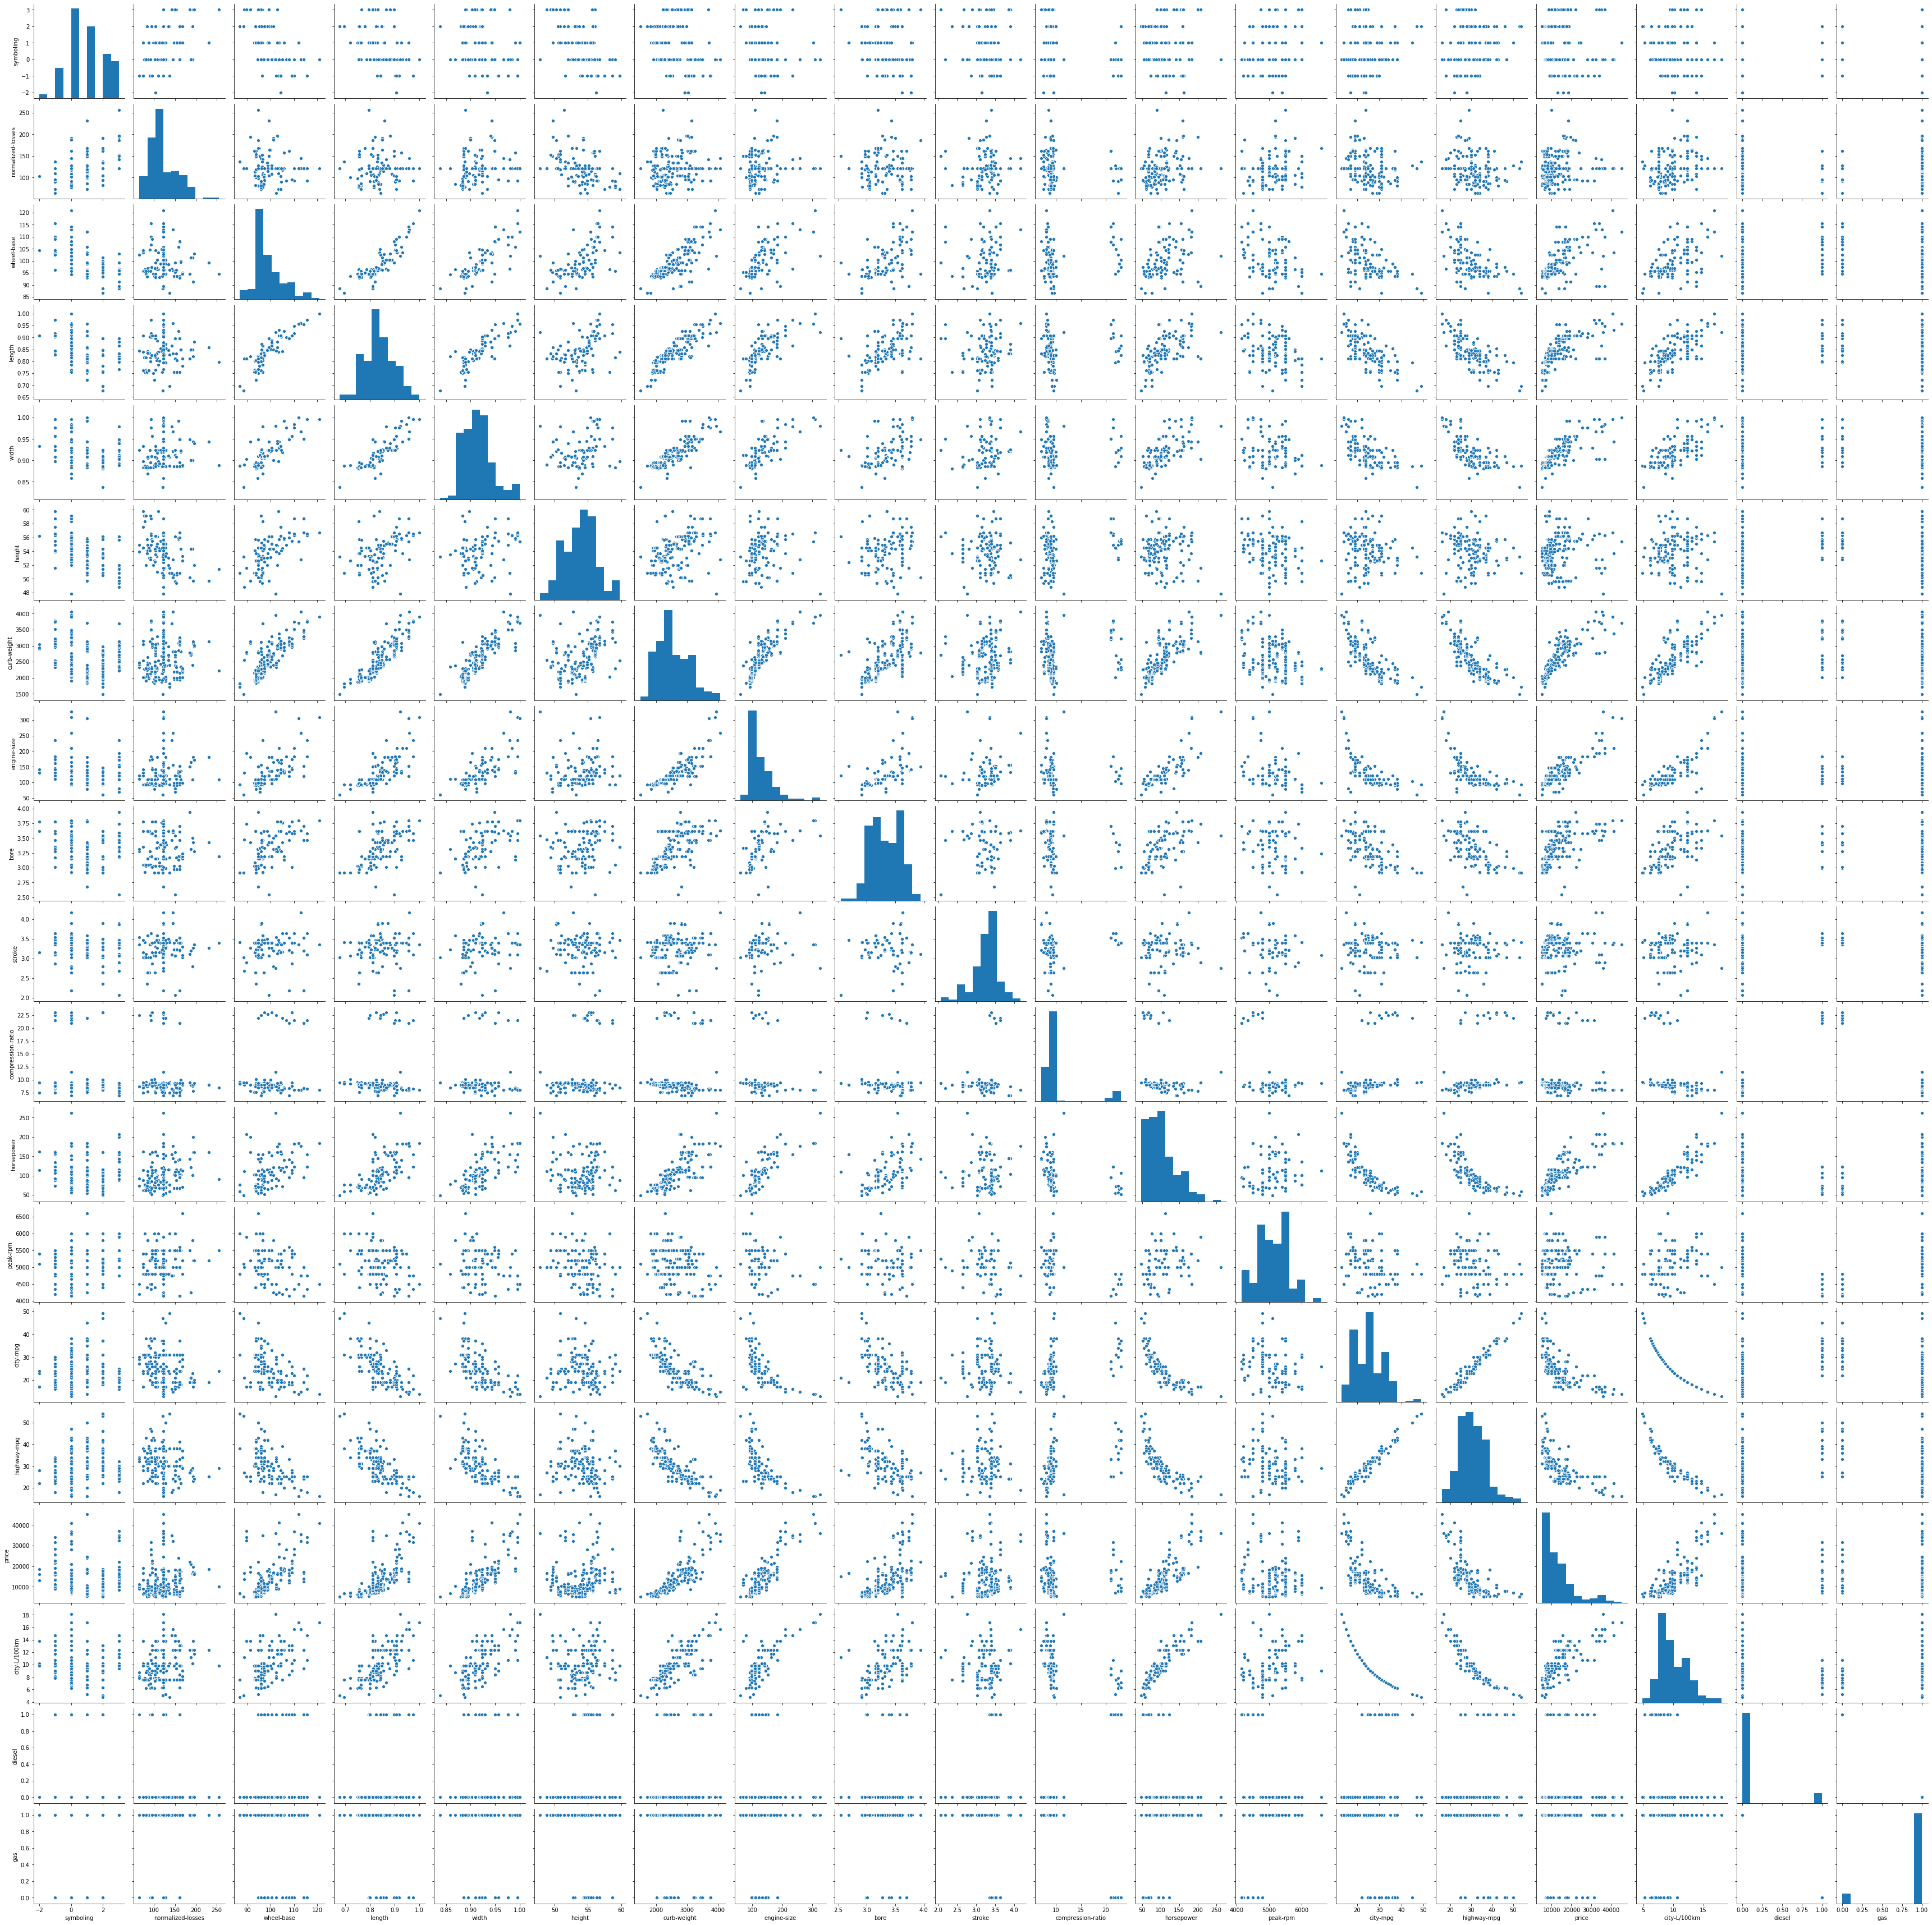

In [37]:
sns.pairplot(df1)

#### Plot a heatmap

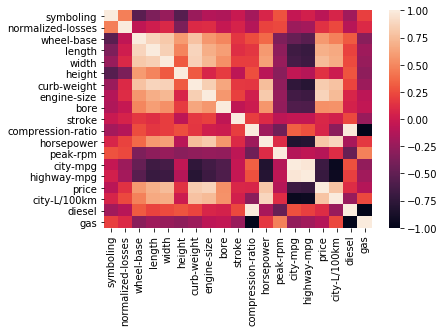

In [38]:
sns.heatmap(cor)

#### Use sns.boxplot() to compare 'body-style' with 'price' and other categorical variables

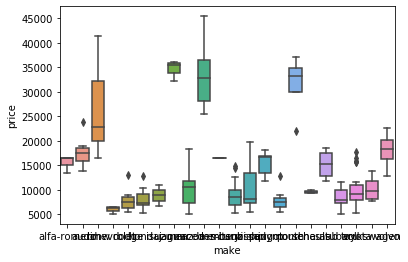

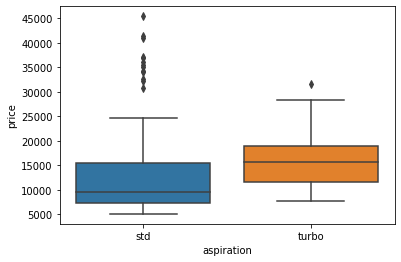

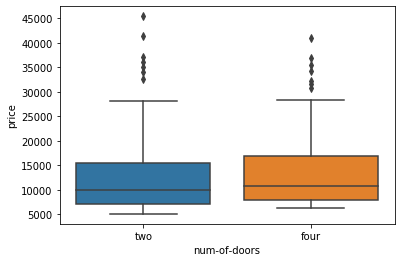

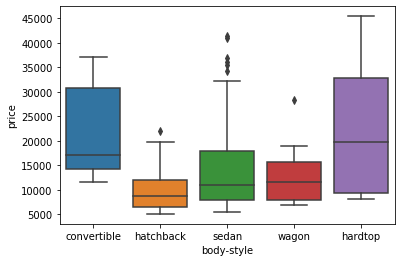

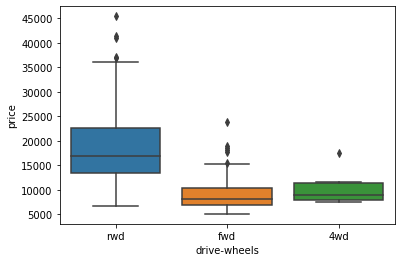

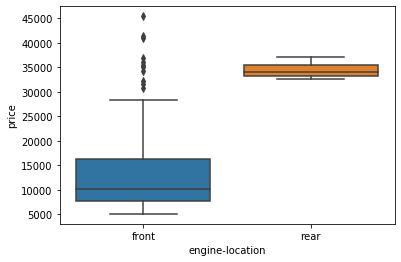

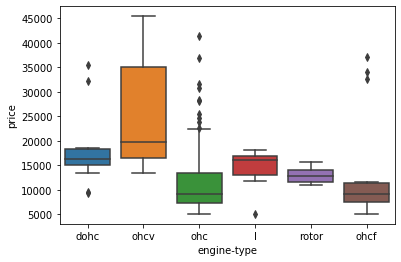

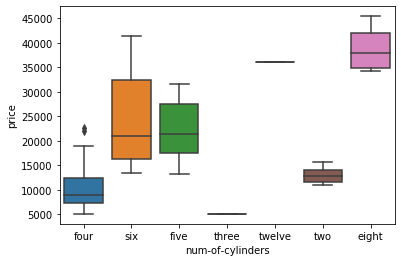

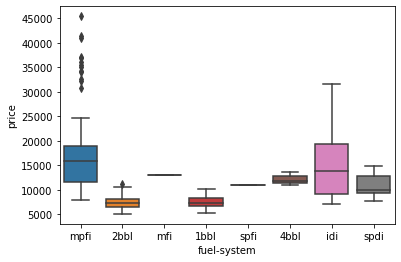

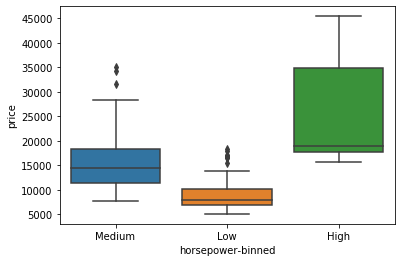

In [39]:
for i in df1.describe(include = np.object).columns:
    sns.boxplot(x=df1[i], y=df1.price)
    plt.show()

#### Use method .describe() to get desciptive statistics for the numeric variables

In [40]:
df1.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  201.000000          201.00000  201.000000  201.000000  201.000000   
mean     0.840796          122.00000   98.797015    0.837102    0.915126   
std      1.254802           31.99625    6.066366    0.059213    0.029187   
min     -2.000000           65.00000   86.600000    0.678039    0.837500   
25%      0.000000          101.00000   94.500000    0.801538    0.890278   
50%      1.000000          122.00000   97.000000    0.832292    0.909722   
75%      2.000000          137.00000  102.400000    0.881788    0.925000   
max      3.000000          256.00000  120.900000    1.000000    1.000000   

           height  curb-weight  engine-size        bore      stroke  \
count  201.000000   201.000000   201.000000  201.000000  197.000000   
mean    53.766667  2555.666667   126.875622    3.330692    3.256904   
std      2.447822   517.296727    41.546834    0.268072    0.319256   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2169.000000    98.000000    3.150000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2926.000000   141.000000    3.580000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         201.000000  201.000000   201.000000  201.000000   201.000000   
mean           10.164279  103.405534  5117.665368   25.179104    30.686567   
std             4.004965   37.365700   478.113805    6.423220     6.815150   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5125.369458   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  262.000000  6600.000000   49.000000    54.000000   

              price  city-L/100km      diesel         gas  
count    201.000000    201.000000  201.000000  201.000000  
mean   13207.129353      9.944145    0.099502    0.900498  
std     7947.066342      2.534599    0.300083    0.300083  
min     5118.000000      4.795918    0.000000    0.000000  
25%     7775.000000      7.833333    0.000000    1.000000  
50%    10295.000000      9.791667    0.000000    1.000000  
75%    16500.000000     12.368421    0.000000    1.000000  
max    45400.000000     18.076923    1.000000    1.000000

#### Use method .describe() to get the descriptive statistics for categorical variables

In [41]:
df1.describe(include=['object'])

make aspiration num-of-doors body-style drive-wheels  \
count      201        201          201        201          201   
unique      22          2            2          5            3   
top     toyota        std         four      sedan          fwd   
freq        32        165          115         94          118   

       engine-location engine-type num-of-cylinders fuel-system  \
count              201         201              201         201   
unique               2           6                7           8   
top              front         ohc             four        mpfi   
freq               198         145              157          92   

       horsepower-binned  
count                200  
unique                 3  
top                  Low  
freq                 115

#### Find out unique values in all the categorical variables

In [42]:
for i in df1.describe(include=['object']).columns:
    print(df1[i].value_counts())

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64
std      165
turbo     36
Name: aspiration, dtype: int64
four    115
two      86
Name: num-of-doors, dtype: int64
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
front    198
rear       3
Name: engine-location, dtype: int64
ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64
four      157
six        24
five       10
two         4
eight 

#### Use .groupby() to get the average price of 'drive-wheels' w.r.t. 'price'

In [43]:
df1.groupby('drive-wheels')['price'].mean()

drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64

#### Do the above for all categorical variables

In [44]:
for i in df1.describe(include=['object']).columns:
    print(df1.groupby(i)['price'].mean())

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64
aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64
body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          123

#### Use groupby() to find the average price for 'drive-wheels' and 'body-style' with price

In [45]:
df1.groupby(['drive-wheels','body-style'])['price'].mean()

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64

4 wd has the highest average price with sedans and lowest with hatchbacks.

fwd has the highest average price with convertible and lowest with hardtop. 

rwd has the highest average price with hardtop and lowest is with wagon.

Overall the most expensive is rwd hardtop and the least expensive is 4wd hatchback

#### Use pivot() on the above result to get 'drive-wheels' as index and 'body-style' as columns

In [46]:
df2 = df1[['drive-wheels','body-style','price']]
group1 = df2.groupby(['drive-wheels','body-style'],as_index=False).mean()
pivot_table = group1.pivot(index = 'drive-wheels', columns = 'body-style')
pivot_table

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

#### Repeat above steps for other variables making different combinations with respect to 'price'

In [47]:
cols = df1.describe(include=np.object).columns
redundant = []
for col1 in cols:
    redundant.append(col1)
    for col2 in cols:
        if col1 != col2 and col2 not in redundant:
            print(f'Pivot Table for \'{col1}\' and \'{col2}\'\n')
            temp = df1[[col1, col2, 'price']]
            pivot = temp.groupby([col1, col2], as_index = False).mean()
            pivot = pivot.pivot(index = col1, columns = col2)
            pivot.fillna('-', inplace = True)
            print(pivot)
            print('\n' + '_'*100 + '\n')

Pivot Table for 'make' and 'aspiration'

                 price         
aspiration         std    turbo
make                           
alfa-romero    15498.3        -
audi             16656    23875
bmw            26118.8        -
chevrolet         6007        -
dodge             6900  9826.33
honda          8184.69        -
isuzu           8916.5        -
jaguar           34600        -
mazda          10652.9        -
mercedes-benz    38900    28394
mercury              -    16503
mitsubishi     7314.71  11485.7
nissan         9869.59    19699
peugot           14649  16189.2
plymouth        7004.6  10360.5
porsche        31400.5        -
renault           9595        -
saab           13642.5    18385
subaru          7954.2  11476.5
toyota         9859.61    10698
volkswagen        9759    11670
volvo          16197.5    20302

____________________________________________________________________________________________________

Pivot Table for 'make' and 'num-of-doors'

             

volvo                18805        -    17785

____________________________________________________________________________________________________

Pivot Table for 'aspiration' and 'num-of-doors'

                     price              
num-of-doors          four           two
aspiration                              
std           12509.847826  12582.931507
turbo         17450.782609  14138.846154

____________________________________________________________________________________________________

Pivot Table for 'aspiration' and 'body-style'

                 price                                              
body-style convertible  hardtop     hatchback         sedan    wagon
aspiration                                                          
std            21890.5  21356.0   9312.089286  13785.210526  10973.6
turbo                -  28176.0  12969.083333  17307.833333  17965.4

____________________________________________________________________________________________________



                price                                                     
engine-type      dohc        l           ohc          ohcf     ohcv  rotor
drive-wheels                                                              
4wd                 -        -  11375.333333   9560.400000        -      -
fwd             18385     5151   9074.980952   7813.285714    13799      -
rwd           18062.7  15489.1  18655.891892  34528.000000  28488.2  13020

____________________________________________________________________________________________________

Pivot Table for 'drive-wheels' and 'num-of-cylinders'

                  price                                                    
num-of-cylinders  eight     five          four      six three twelve    two
drive-wheels                                                               
4wd                   -  17450.0   9211.142857        -     -      -      -
fwd                   -  17810.0   8764.091743    13799  5151      -      -
rwd         

spfi                     -    11048        -

____________________________________________________________________________________________________



#### Plot a heatmap for the first pivot table

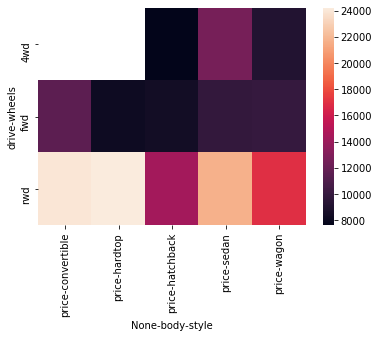

In [48]:
sns.heatmap(pivot_table)

#### Calculate the pearson correlation between “wheel-base” and “price”. What can you conclude from p-value
(Hint: use stats from scipy which has pearsonr( ) )

In [49]:
from scipy import stats

In [50]:
pearson_coef, p_value = stats.pearsonr(df1['wheel-base'], df1['price'])
print(f'The Pearson Correlation Coefficient is: {pearson_coef} with a P-value of {p_value}')

The Pearson Correlation Coefficient is: 0.584641822265508 with a P-value of 8.076488270733218e-20


Since the P-value is < 0.01, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

#### Perform one way ANOVA test using f_oneway() of stats to check if different groups of “drive-wheels” are correlated with “price”. What do you understand from F-test and p-value results?

In [51]:
df3 = df1[['drive-wheels','price']].groupby(['drive-wheels'])

f_val, p_val = stats.f_oneway(df3.get_group('fwd')['price'], 
                              df3.get_group('4wd')['price'], 
                              df3.get_group('rwd')['price'])
print(f'ANOVA results:\nF-score: {f_val}\nP-value: {p_val}')

ANOVA results:
F-score: 67.95406500780398
P-value: 3.3945443577151245e-23


Large F-score shows strong correlation and P-value < 0.01 shows statistical significance

In [52]:
df3 = df1[['drive-wheels','price']].groupby(['drive-wheels'])

f_val, p_val = stats.f_oneway(df3.get_group('fwd')['price'], df3.get_group('4wd')['price'])
print(f'ANOVA results for \'fwd\' and \'4wd\':\nF-score: {f_val}\nP-value: {p_val}\n')

f_val, p_val = stats.f_oneway(df3.get_group('4wd')['price'], df3.get_group('rwd')['price'])
print(f'ANOVA results for \'4wd\' and \'rwd\':\nF-score: {f_val}\nP-value: {p_val}\n')

f_val, p_val = stats.f_oneway(df3.get_group('rwd')['price'], df3.get_group('fwd')['price'])
print(f'ANOVA results for \'rwd\' and \'fwd\':\nF-score: {f_val}\nP-value: {p_val}')

ANOVA results for 'fwd' and '4wd':
F-score: 0.6654657502523033
P-value: 0.41620116697845666

ANOVA results for '4wd' and 'rwd':
F-score: 8.580681368924756
P-value: 0.004411492211225333

ANOVA results for 'rwd' and 'fwd':
F-score: 130.55331609591104
P-value: 2.235530635567824e-23


* For 'fwd' and '4wd'- low F-score shows weak correlation and P-value > 0.01 low to zero statistical significance
* For '4wd' and 'rwd'- average F-score shows low correlation and P-value < 0.01 moderate statistical significance
* For 'rwd' and 'fwd'- high F-score shows strong correlation and P-value < 0.01 strong statistical significance

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables: Continuous numerical variables: Length Width Curb-weight Engine-size Horsepower City-mpg Highway-mpg Wheel-base Bore Categorical variables: Drive-wheels